# Курсовая работа

## Источник данных

[Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/data)

### Dataset Description
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

### File and Data Field Descriptions

* **train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

* **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

* **sample_submission.csv** - A submission file in the correct format.

- PassengerId - Id for each passenger in the test set.
- Transported - The target. For each passenger, predict either True or False.

## Exploratory Data Analysis

### Columns modification

- PassengerId - (???) split into two part: group number and number in group 

- HomePlanet - code with dummy, NaN - оставляем как есть

- CryoSleep - change to 0/1

- Cabin - split into three part: Deck Num Side

- Destination - code with dummy, NaN - оставляем как есть

- Age - OK, NaN заменим на (-999)

- VIP - change to 0/1, NaN - заменяем на 0

- RoomService - OK, NaN - заменяем на 0

- FoodCourt - OK, NaN - заменяем на 0

- ShoppingMall - OK, NaN - заменяем на 0

- Spa - OK, NaN - заменяем на 0

- VRDeck - OK

- Name - remove

- Transported - bool - OK  

In [538]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.core.interchange.dataframe_protocol import DataFrame
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import NuSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier

RANDOM_STATE = 84


In [539]:



data = pd.read_csv('train.csv', index_col=0)
data.head(100) 

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0103_01,Earth,False,F/24/S,TRAPPIST-1e,24.0,False,0.0,NaN,0.0,0.0,17.0,Arlen Mclainez,True
0103_02,Earth,True,G/18/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Mclainez,True
0103_03,Earth,True,G/18/S,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Fanne Mclainez,False


In [540]:
data.describe(include='all')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Glena Hahnstonsen,True
freq,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [541]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [542]:
data.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [543]:
data.groupby(['Transported'])['Transported'].count()


Transported
False    4315
True     4378
Name: Transported, dtype: int64

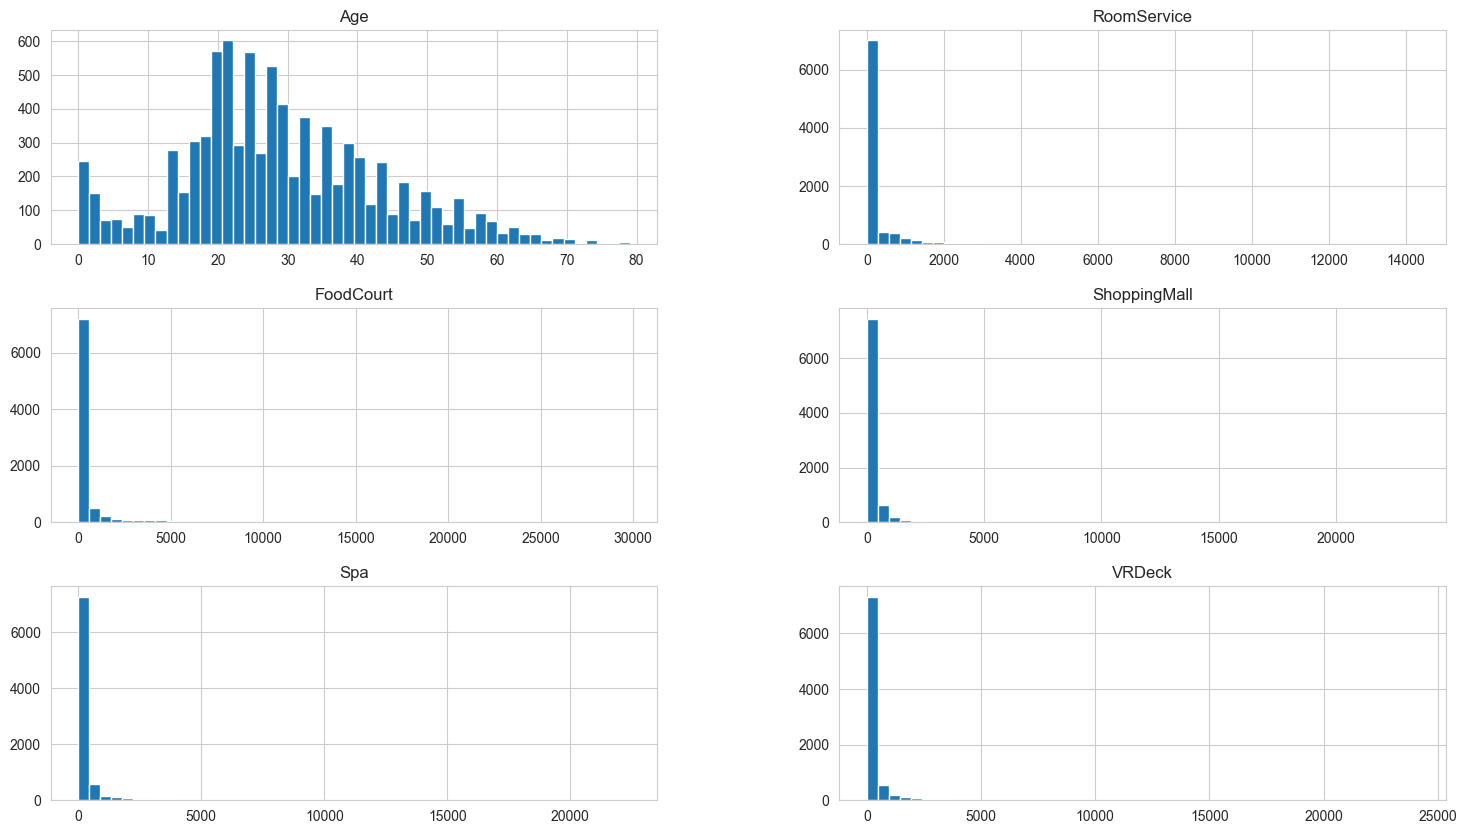

In [544]:
data.hist(figsize=(18, 10),bins=50);


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

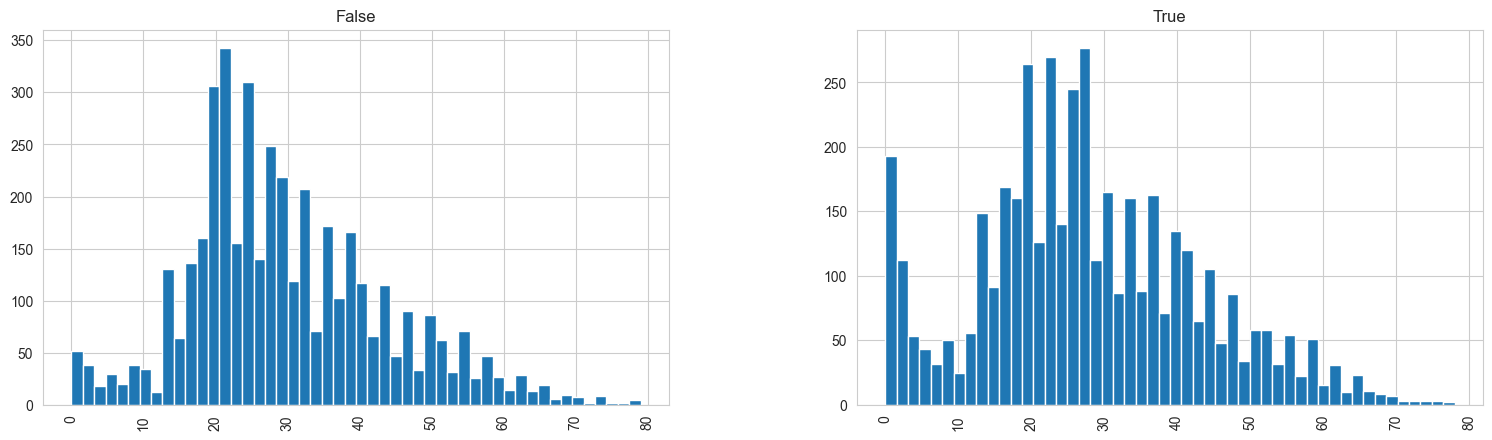

In [545]:
data.hist(['Age'],bins=50,by='Transported',figsize=(18, 5))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

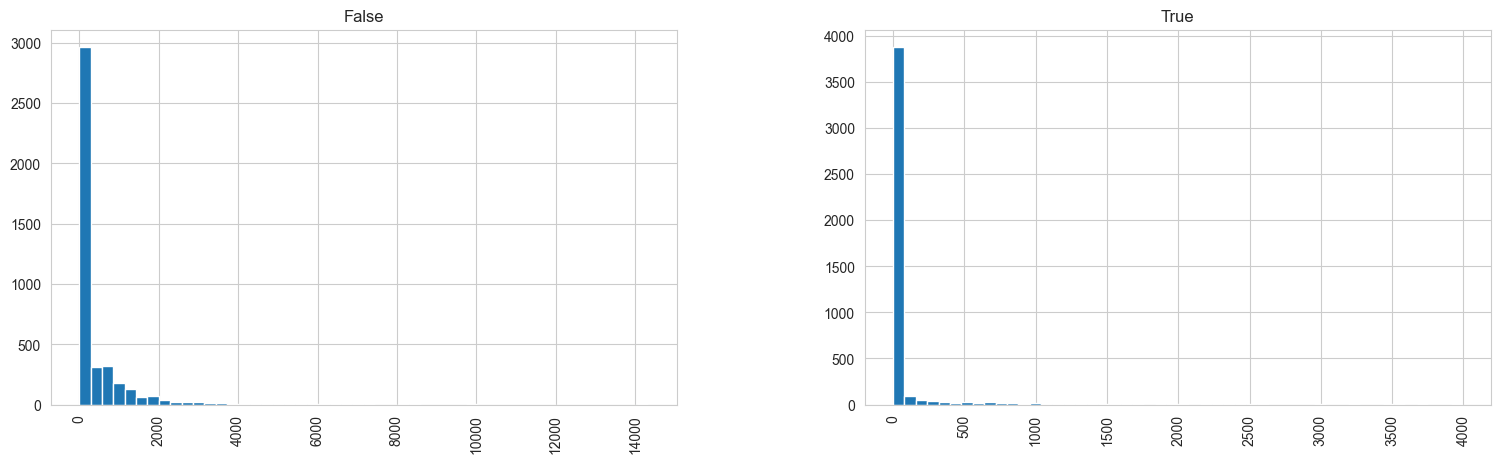

In [546]:
data.hist(['RoomService'],bins=50,by='Transported',figsize=(18, 5))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

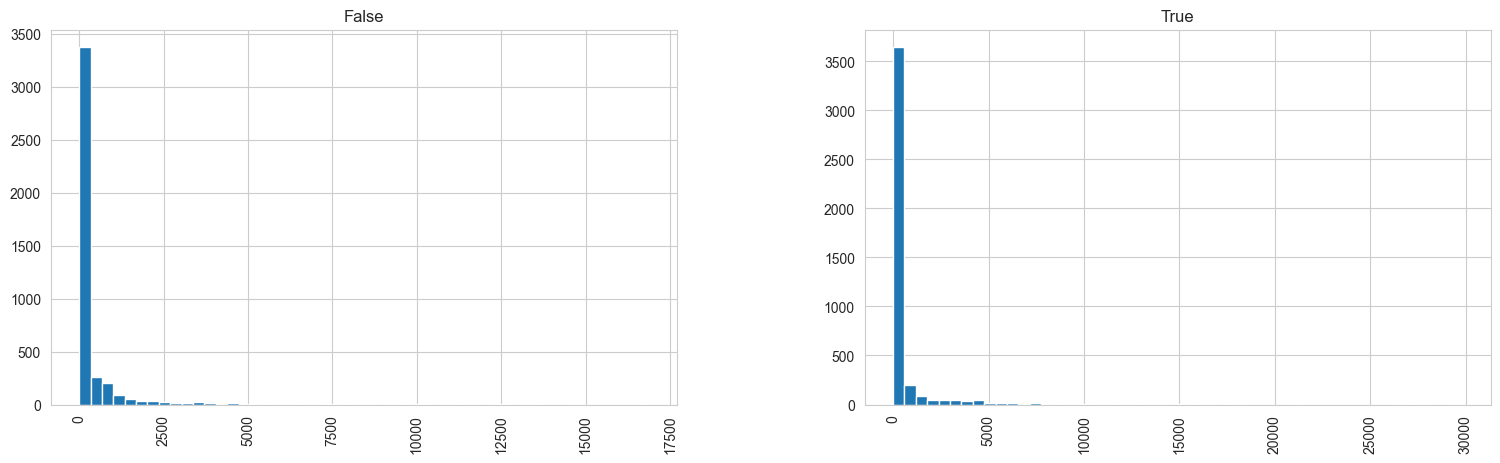

In [547]:
data.hist(['FoodCourt'],bins=50,by='Transported',figsize=(18, 5))


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

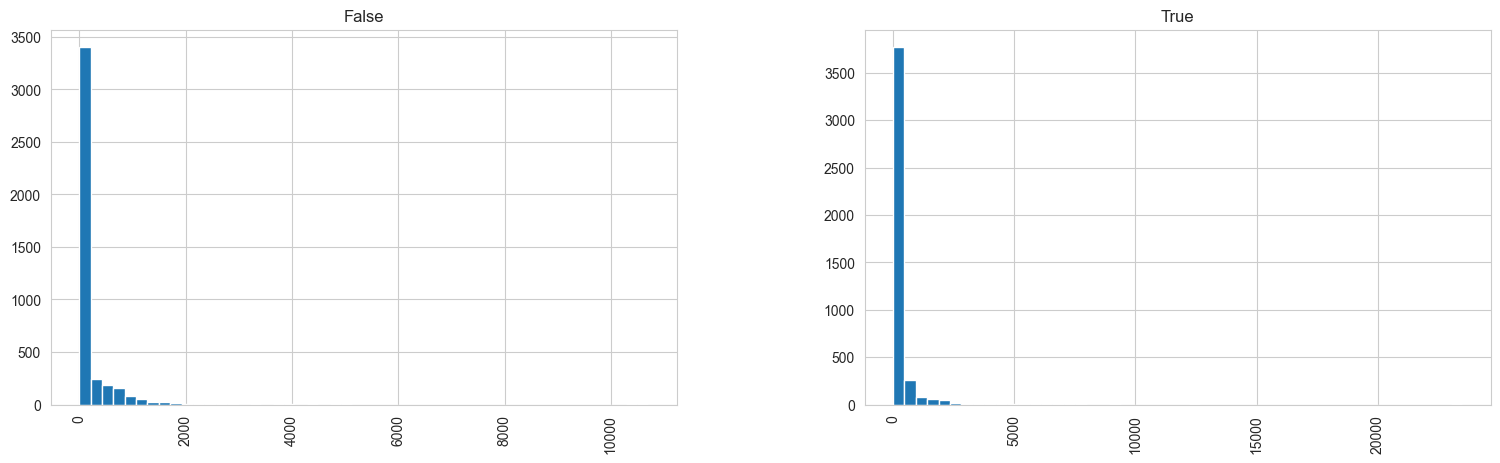

In [548]:
data.hist(['ShoppingMall'],bins=50,by='Transported',figsize=(18, 5))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

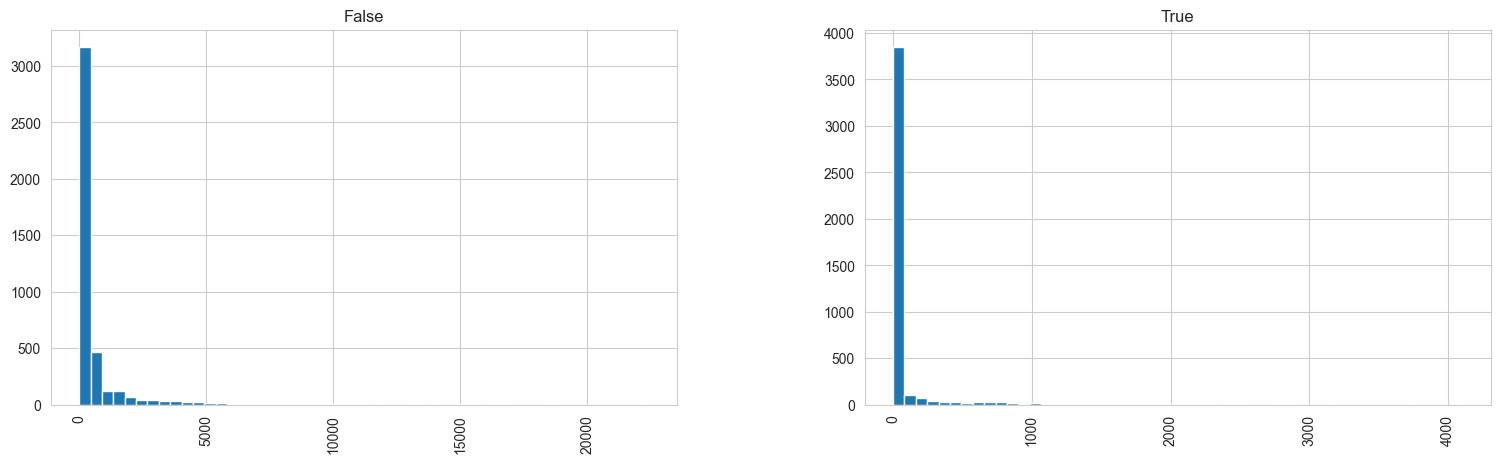

In [549]:
data.hist(['Spa'],bins=50,by='Transported',figsize=(18, 5))


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

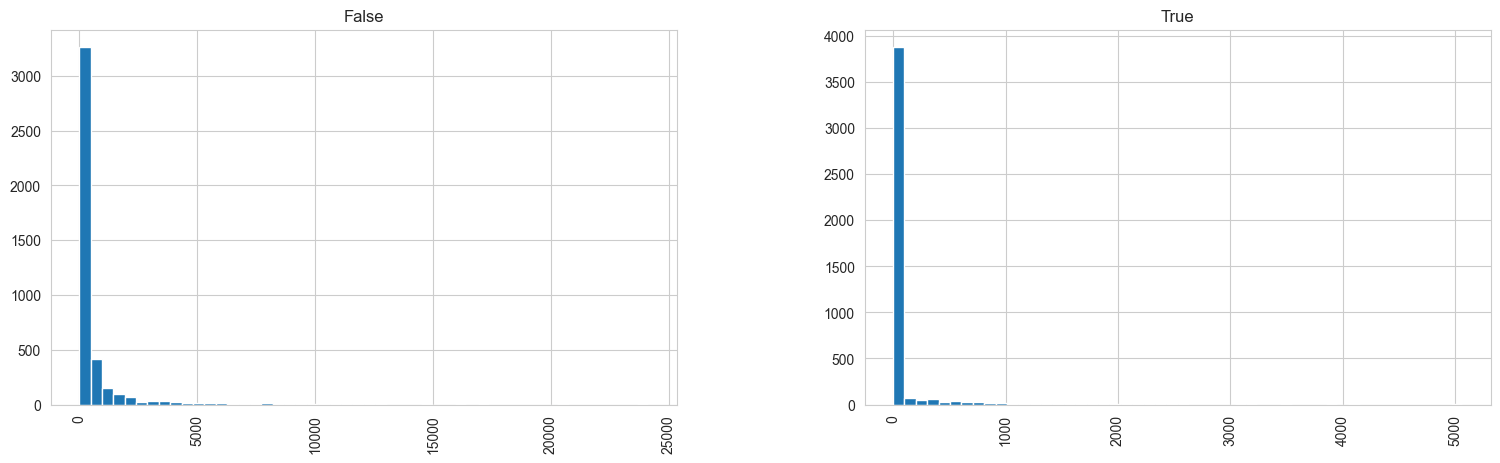

In [550]:
data.hist(['VRDeck'],bins=50,by='Transported',figsize=(18, 5))


array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

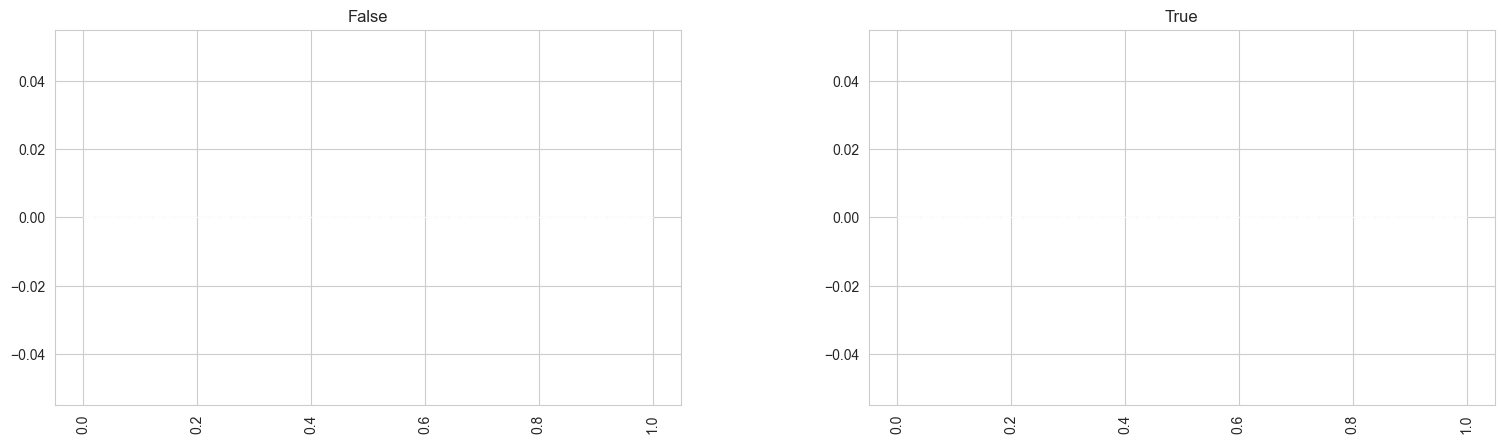

In [551]:
data.hist(['VIP'],bins=50,by='Transported',figsize=(18, 5))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

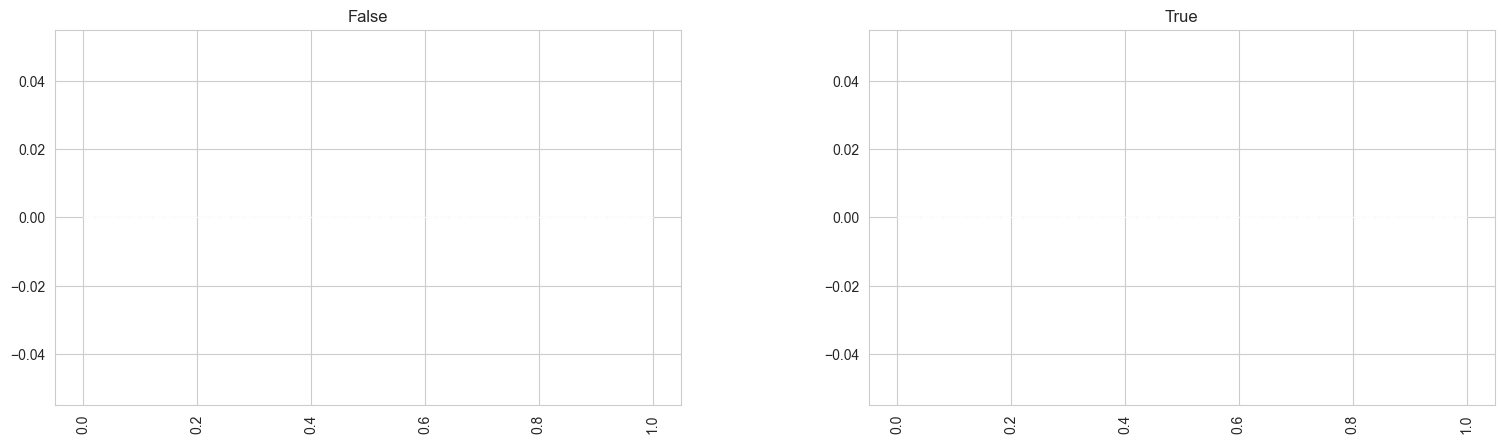

In [552]:
data.hist(['CryoSleep'],bins=50,by='Transported',figsize=(18, 5))
# Looks like it's very important feature 

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

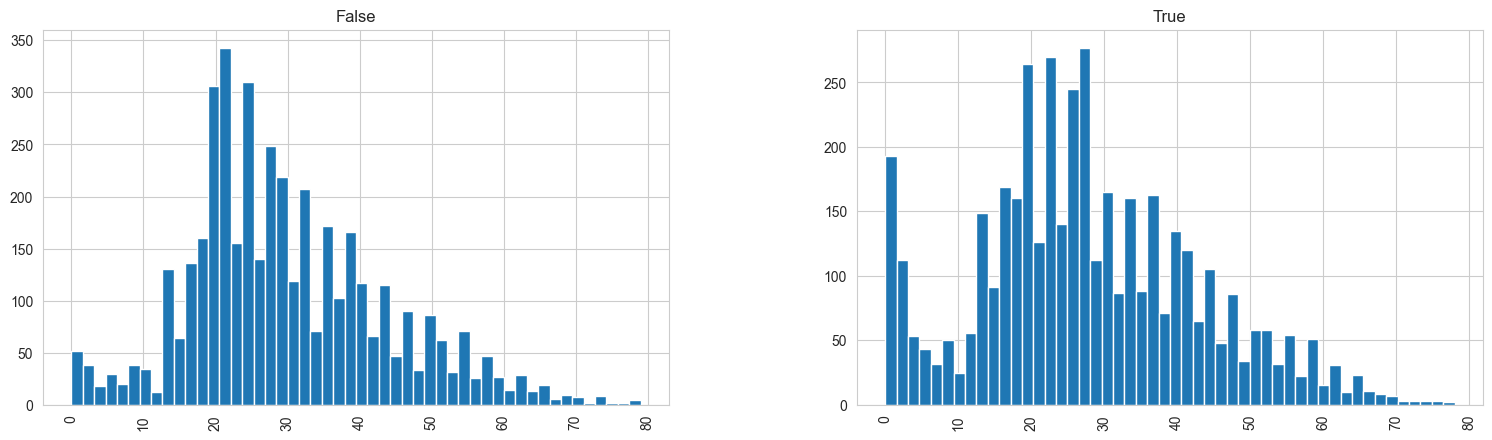

In [553]:
data.hist(['Age'],bins=50,by='Transported',figsize=(18, 5))


### Data preparation

In [554]:
# Let prepeare passenger id
data['PassengerNum'] = data.index
data_passenger=data['PassengerNum'].str.split('_', n=1, expand=True).rename(columns={0: "GroupNum", 1: "NumInGroup" })
data_passenger[["GroupNum", "NumInGroup"]] = data_passenger[["GroupNum", "NumInGroup"]].apply(pd.to_numeric)
# add group number and number in group
data=data.join(data_passenger,how='left')
data_groups = data_passenger.groupby(['GroupNum']).count()
data_groups.rename(columns={'NumInGroup': 'Count'}, inplace=True)
data = data.join(data_groups, how='left', on='GroupNum')
data = data.drop('PassengerNum', axis=1).drop('GroupNum', axis=1).drop('NumInGroup', axis=1)


# HomePlanet - code with dummy, NaN - left as it is
data = pd.get_dummies(data, columns=['HomePlanet'], prefix_sep='=', dummy_na=True)


# CryoSleep - change to 0/1, NaN - replace with False
pd.set_option('future.no_silent_downcasting', True)
data.loc[:, 'CryoSleep'] = data.CryoSleep.replace({False: 0, True: 1})
data.loc[:, 'CryoSleep'] = data.CryoSleep.fillna(True)

# Cabin - split into three part: Deck Num Side
data_cabin=data['Cabin'].str.split('/', n=2, expand=True).rename(columns={0: "Deck", 1: "Num", 2: "Side" })
data=data.join(data_cabin,how='left')

#Age - OK, NaN replace with smth
data.loc[:, 'Age'] = data.Age.fillna(100)

# VIP - change to 0/1, NaN - replace with False
#with pd.set_option("future.no_silent_downcasting", True):
data.loc[:, 'VIP'] = data.VIP.replace({False: 0, True: 1})
data.loc[:, 'VIP'] = data.VIP.infer_objects(copy=False).fillna(False)


# RoomService - OK, NaN - replace with 0
# FoodCourt - OK, NaN - replace with 0
# ShoppingMall - OK, NaN - replace with 0
# Spa - OK, NaN - replace with 0
# VRDeck - OK
data.loc[:, 'RoomService'] = data.RoomService.fillna(0)
data.loc[:, 'FoodCourt'] = data.FoodCourt.fillna(0)
data.loc[:, 'ShoppingMall'] = data.ShoppingMall.fillna(0)
data.loc[:, 'Spa'] = data.Spa.fillna(0)
data.loc[:, 'VRDeck'] = data.VRDeck.fillna(0)


data[["CryoSleep", "VIP"]] = data[["CryoSleep", "VIP"]].apply(pd.to_numeric)

# Add name length
namelendf = data['Name'].str.len()
data = data.join(namelendf.rename('NameLen'), how='left')
data.loc[:, 'NameLen'] = data.NameLen.fillna(0)

# Drop column
# Name  - unique field
# Num  - 1817 unique values, so it's almost unique field
data = data.drop('Name', axis=1).drop('Num', axis=1).drop('Cabin', axis=1)

In [555]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CryoSleep          8693 non-null   int64  
 1   Destination        8511 non-null   object 
 2   Age                8693 non-null   float64
 3   VIP                8693 non-null   float64
 4   RoomService        8693 non-null   float64
 5   FoodCourt          8693 non-null   float64
 6   ShoppingMall       8693 non-null   float64
 7   Spa                8693 non-null   float64
 8   VRDeck             8693 non-null   float64
 9   Transported        8693 non-null   bool   
 10  Count              8693 non-null   int64  
 11  HomePlanet=Earth   8693 non-null   bool   
 12  HomePlanet=Europa  8693 non-null   bool   
 13  HomePlanet=Mars    8693 non-null   bool   
 14  HomePlanet=nan     8693 non-null   bool   
 15  Deck               8494 non-null   object 
 16  Side               8

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

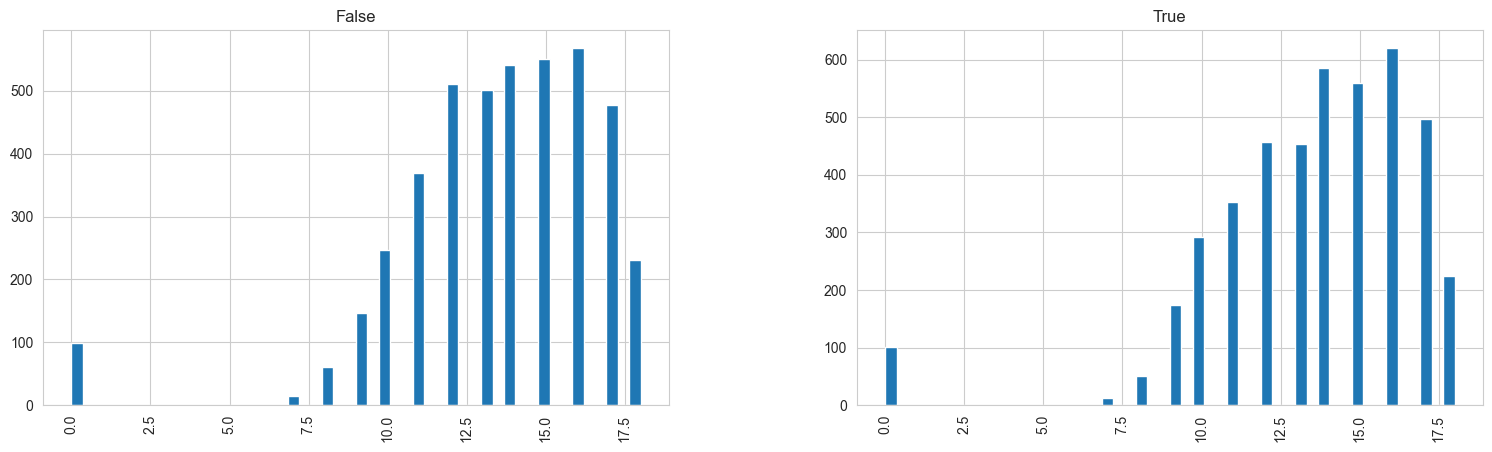

In [556]:
data.hist(['NameLen'],bins=50,by='Transported',figsize=(18, 5))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

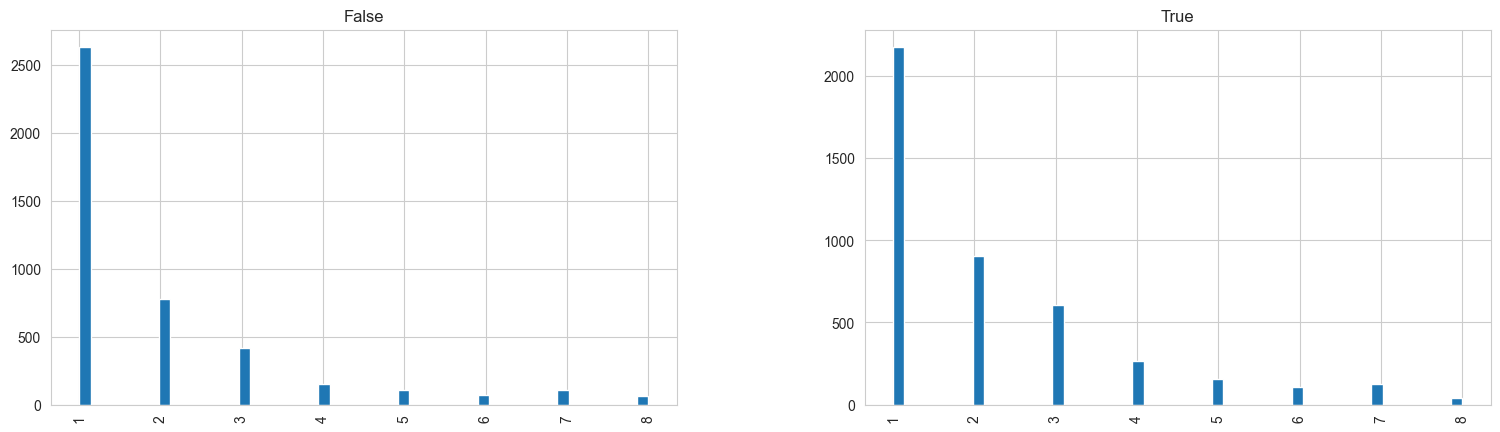

In [557]:
data.hist(['Count'],bins=50,by='Transported',figsize=(18, 5))


### A bit more analysis


In [558]:
data.groupby(['Deck','Transported'])['Transported'].count()

Deck  Transported
A     False           129
      True            127
B     False           207
      True            572
C     False           239
      True            508
D     False           271
      True            207
E     False           563
      True            313
F     False          1565
      True           1229
G     False          1238
      True           1321
T     False             4
      True              1
Name: Transported, dtype: int64

In [559]:
data.groupby(['Transported','Side'])['Transported'].count()
# Looks like it's very important feature 

Transported  Side
False        P       2308
             S       1908
True         P       1898
             S       2380
Name: Transported, dtype: int64

In [560]:
data.groupby(['Transported','Destination'])['Transported'].count()
# a тут есть какая то зависимость

Transported  Destination  
False        55 Cancri e       702
             PSO J318.5-22     395
             TRAPPIST-1e      3128
True         55 Cancri e      1098
             PSO J318.5-22     401
             TRAPPIST-1e      2787
Name: Transported, dtype: int64

### Dummy preparation

In [561]:
# Deck, Side - code with dummy
data = pd.get_dummies(data, columns=['Deck', 'Side'], prefix_sep='=', drop_first=True,dummy_na=True)

# Destination - code with dummy, NaN - left as it is
data = pd.get_dummies(data, columns=['Destination'], prefix_sep='=')

In [562]:
data.groupby(['Transported','Deck=nan']).count()


CryoSleep   Age   VIP  RoomService  FoodCourt  \
Transported Deck=nan                                                  
False       False          4216  4216  4216         4216       4216   
            True             99    99    99           99         99   
True        False          4278  4278  4278         4278       4278   
            True            100   100   100          100        100   

                      ShoppingMall   Spa  VRDeck  Count  HomePlanet=Earth  \
Transported Deck=nan                                                        
False       False             4216  4216    4216   4216              4216   
            True                99    99      99     99                99   
True        False             4278  4278    4278   4278              4278   
            True               100   100     100    100               100   

                      ...  Deck=D  Deck=E  Deck=F  Deck=G  Deck=T  Side=S  \
Transported Deck=nan  ...                                                   
False       False     ...    4216    4216    4216    4216    4216    4216   
            True      ...      99      99      99      99      99      99   
True        False     ...    4278    4278    4278    4278    4278    4278   
            True      ...     100     100     100     100     100     100   

                      Side=nan  Destination=55 Cancri e  \
Transported Deck=nan                                      
False       False         4216                     4216   
            True            99                       99   
True        False         4278                     4278   
            True           100                      100   

                      Destination=PSO J318.5-22  Destination=TRAPPIST-1e  
Transported Deck=nan                                                      
False       False                          4216                     4216  
            True                             99                       99  
True        False                          4278                     4278  
            True                            100                      100  

[4 rows x 26 columns]

In [563]:
data.head(100)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Count,...,Deck=E,Deck=F,Deck=G,Deck=T,Deck=nan,Side=S,Side=nan,Destination=55 Cancri e,Destination=PSO J318.5-22,Destination=TRAPPIST-1e
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1,...,False,False,False,False,False,False,False,False,False,True
0002_01,0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True,1,...,False,True,False,False,False,True,False,False,False,True
0003_01,0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False,2,...,False,False,False,False,False,True,False,False,False,True
0003_02,0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,2,...,False,False,False,False,False,True,False,False,False,True
0004_01,0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True,1,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0103_01,0,24.0,0.0,0.0,0.0,0.0,0.0,17.0,True,3,...,False,True,False,False,False,True,False,False,False,True
0103_02,1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,True,3,...,False,False,True,False,False,True,False,True,False,False
0103_03,1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,False,3,...,False,False,True,False,False,True,False,False,False,True


In [564]:
data.describe(include='all')

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Count,...,Deck=E,Deck=F,Deck=G,Deck=T,Deck=nan,Side=S,Side=nan,Destination=55 Cancri e,Destination=PSO J318.5-22,Destination=TRAPPIST-1e
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693,8693.000000,...,8693,8693,8693,8693,8693,8693,8693,8693,8693,8693
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,False,False,False,False,False,False,False,False,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4378,NaN,...,7817,5899,6134,8688,8494,4405,8494,6893,7897,5915
mean,0.374324,30.293455,0.022892,220.009318,448.434027,169.572300,304.588865,298.261820,NaN,2.035546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.483976,17.543570,0.149568,660.519050,1595.790627,598.007164,1125.562559,1134.126417,NaN,1.596347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,39.000000,0.000000,41.000000,61.000000,22.000000,53.000000,40.000000,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [565]:
data.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Count                        0
HomePlanet=Earth             0
HomePlanet=Europa            0
HomePlanet=Mars              0
HomePlanet=nan               0
NameLen                      0
Deck=B                       0
Deck=C                       0
Deck=D                       0
Deck=E                       0
Deck=F                       0
Deck=G                       0
Deck=T                       0
Deck=nan                     0
Side=S                       0
Side=nan                     0
Destination=55 Cancri e      0
Destination=PSO J318.5-22    0
Destination=TRAPPIST-1e      0
dtype: int64

### Discovery


In [566]:
data['Transported'].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

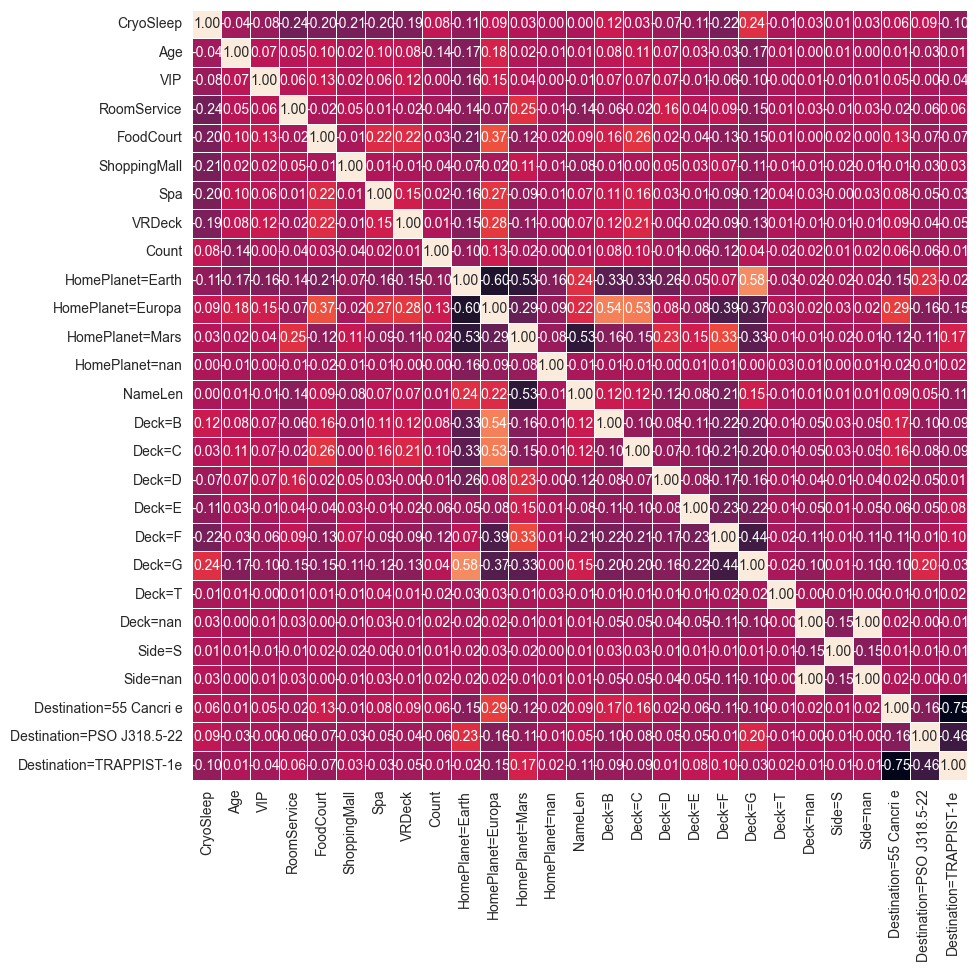

In [567]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop('Transported', axis=1).corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()
# The passengers from Europe are located on the desks B,C mostly. They are like spend money as well)
# The passengers from Earth are located on the desk G mostly
# The passengers from Mars are located on the desk G mostly


## Let's start the main action

### Split

In [568]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Transported', axis=1), data['Transported'], test_size=0.3, random_state=RANDOM_STATE)

### Scaler

In [569]:
#scaler = RobustScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Remove columns just for repots

In [570]:
data = data.drop('NameLen', axis=1)
data = data.drop('Count', axis=1)
data = data.drop('Deck=nan', axis=1)
data = data.drop('Deck=B', axis=1)
data = data.drop('Deck=C', axis=1)
data = data.drop('Deck=D', axis=1)
data = data.drop('Deck=E', axis=1)
data = data.drop('Deck=F', axis=1)
data = data.drop('Deck=G', axis=1)
data = data.drop('Deck=T', axis=1)



## Array of models 
Let's create a list of the most common models

In [571]:
estimators = [('LogisticRegression',LogisticRegression(random_state=0, max_iter=10000)),
              ('GradientBoostingClassifier',GradientBoostingClassifier(random_state=0)),
              ('SVC',SVC(probability=True, random_state=RANDOM_STATE))]

estimator = RandomForestClassifier(random_state=0)

models = [KNeighborsClassifier(n_neighbors=11),
          LogisticRegression(C=0.001), 
          LogisticRegressionCV(Cs=np.logspace(-5, 20, 50), random_state=RANDOM_STATE, refit=True, scoring='accuracy',max_iter = 1000),
          DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, criterion='gini'),
          NuSVC(),
          GradientBoostingClassifier(n_estimators=300, max_depth=2),
          BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_jobs=-1, n_estimators=100),
          RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth = 3, oob_score=True),
          StackingClassifier(estimators=estimators, final_estimator=estimator)]

results = []

for model in models:
    model.fit(X_train_scaled, y_train)
    results.append([type(model),accuracy_score(model.predict(X_train_scaled), y_train),accuracy_score(model.predict(X_test_scaled), y_test)] )
    print(type(model),' - finished')
df = pd.DataFrame(results, columns=['Type', 'TrainAccuracy','TestAccuracy'])
df

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>  - finished
<class 'sklearn.linear_model._logistic.LogisticRegression'>  - finished
<class 'sklearn.linear_model._logistic.LogisticRegressionCV'>  - finished
<class 'sklearn.tree._classes.DecisionTreeClassifier'>  - finished
<class 'sklearn.svm._classes.NuSVC'>  - finished
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>  - finished
<class 'sklearn.ensemble._bagging.BaggingClassifier'>  - finished
<class 'sklearn.ensemble._forest.RandomForestClassifier'>  - finished
<class 'sklearn.ensemble._stacking.StackingClassifier'>  - finished


,Type,TrainAccuracy,TestAccuracy
0,<class 'sklearn.neighbors._classification.KNeighborsClassifier'>,0.800822,0.769939
1,<class 'sklearn.linear_model._logistic.LogisticRegression'>,0.763188,0.763037
2,<class 'sklearn.linear_model._logistic.LogisticRegressionCV'>,0.791783,0.785276
3,<class 'sklearn.tree._classes.DecisionTreeClassifier'>,0.787675,0.773773
4,<class 'sklearn.svm._classes.NuSVC'>,0.811997,0.791411
5,<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>,0.816763,0.801380
6,<class 'sklearn.ensemble._bagging.BaggingClassifier'>,0.764667,0.758052
7,<class 'sklearn.ensemble._forest.RandomForestClassifier'>,0.742810,0.739264
8,<class 'sklearn.ensemble._stacking.StackingClassifier'>,0.816270,0.789110
